<a href="https://colab.research.google.com/github/Ujwala2003/Pandas/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


We first import pandas under the name pd using the **import pandas as pd** command.

In [ ]:
import pandas as pd

Mounting Google drive to Collab (Must enter the authorisation code).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The path to the folder containing data must be given

In [ ]:
DatasetBaseFolder = '/content/gdrive/MyDrive/ColabNotebooks/PandasTL/Datasets/'

Creating a dataframe by giving data:

In [ ]:
data = {
    'pens' : [3,4,2,8],
    'pencils' : [5,3,7,10]
}
purchases=pd.DataFrame(data);
purchases

,pens,pencils
0,3,5
1,4,3
2,2,7
3,8,10


In [ ]:
movies_df = pd.read_csv(DatasetBaseFolder+"IMDB-Movie-Data.csv", index_col="Title")

Using head(n) we can see first n rows of the data.

In [ ]:
movies_df.head(8)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0


Similarly using tail(n) we can see last n lines of the data.

In [ ]:
movies_df.tail(8)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Take Me Home Tonight,993,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


The shape of data can be found using .shape

In [ ]:
movies_df.shape

(1000, 11)

To get information about the dataset we can use .info

In [ ]:
movies_df.info

<bound method DataFrame.info of                          Rank  ... Metascore
Title                          ...          
Guardians of the Galaxy     1  ...      76.0
Prometheus                  2  ...      65.0
Split                       3  ...      62.0
Sing                        4  ...      59.0
Suicide Squad               5  ...      40.0
...                       ...  ...       ...
Secret in Their Eyes      996  ...      45.0
Hostel: Part II           997  ...      46.0
Step Up 2: The Streets    998  ...      50.0
Search Party              999  ...      22.0
Nine Lives               1000  ...      11.0

[1000 rows x 11 columns]>

To drop all the duplicates(Repetitions) values,use .drop_duplicates.If you want to keep the first occurences and remove the other repetiotions use keep='first'

In [ ]:
movies_df = movies_df.drop_duplicates(keep = 'first') 

Displaying the names of columns is done simply using .columns

In [ ]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Renaming the columns can be done using .rename(columns={'oldname:'newname',..})

In [ ]:
movies_df.rename(columns={'Runtime (Minutes)':'Runtime_minutes','Revenue (Millions)':'Revenue_millions'},inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_minutes', 'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

To count the total number of null entries in each column we use isnull().sum()


In [ ]:
movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime_minutes       0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

To drop all the null instances we use .dropna(axis=0).

axis=0 represents along rows.

To drop the columns containing null values, we use .dropna(axis=1).

axis=1 represents along columns.

In [ ]:
movies_df1=movies_df.dropna(axis=0)
movies_df1.shape

(838, 11)

In [ ]:
movies_df2=movies_df.dropna(axis=1)
movies_df2.shape

(1000, 9)

Accessing a specific column:

In [ ]:
revenue=movies_df['Revenue_millions']
revenue.head()

Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
Name: Revenue_millions, dtype: float64

Now, finding the mean of this column and replacing all the null values with the mean value(using fillna).


In [ ]:
meanrevenue= revenue.mean(0)
revenue.fillna(meanrevenue,inplace=True)
movies_df.isnull().sum()

Rank                 0
Genre                0
Description          0
Director             0
Actors               0
Year                 0
Runtime_minutes      0
Rating               0
Votes                0
Revenue_millions     0
Metascore           64
dtype: int64

To get a description of the dataset,.decribe() is used


In [ ]:
movies_df.describe()

,Rank,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


To count the number of rows of a particular type, we use value_counts

In [ ]:
movies_df['Director'].value_counts()

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Michael Bay           6
Paul W.S. Anderson    6
                     ..
Stephen Frears        1
Matteo Garrone        1
Gregory Jacobs        1
Bruce Beresford       1
Jake Schreier         1
Name: Director, Length: 644, dtype: int64

corr() is used to find the pairwise correlation of all columns in the dataframe. 

In [ ]:
movies_df.corr()

,Rank,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
Runtime_minutes,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
Revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


Slicing across columns

In [ ]:
new=movies_df[['Director','Rating']]
new

,Director,Rating
Title,,
Guardians of the Galaxy,James Gunn,8.1
Prometheus,Ridley Scott,7.0
Split,M. Night Shyamalan,7.3
Sing,Christophe Lourdelet,7.2
Suicide Squad,David Ayer,6.2
...,...,...
Secret in Their Eyes,Billy Ray,6.2
Hostel: Part II,Eli Roth,5.5
Step Up 2: The Streets,Jon M. Chu,6.2


The data can be sliced along rows using loc and the rowname or using iloc and rowindex.

In [ ]:
new=movies_df.loc['Project X']
new

Rank                                                              995
Genre                                                          Comedy
Description         3 high school seniors throw a birthday party t...
Director                                              Nima Nourizadeh
Actors              Thomas Mann, Oliver Cooper, Jonathan Daniel Br...
Year                                                             2012
Runtime_minutes                                                    88
Rating                                                            6.7
Votes                                                          164088
Revenue_millions                                                54.72
Metascore                                                          48
Name: Project X, dtype: object

In [ ]:
new=movies_df.iloc[994]
new

Rank                                                              995
Genre                                                          Comedy
Description         3 high school seniors throw a birthday party t...
Director                                              Nima Nourizadeh
Actors              Thomas Mann, Oliver Cooper, Jonathan Daniel Br...
Year                                                             2012
Runtime_minutes                                                    88
Rating                                                            6.7
Votes                                                          164088
Revenue_millions                                                54.72
Metascore                                                          48
Name: Project X, dtype: object

To display rows between two indices use iloc[m:n]-Then the rows from index=m to index=n-1 will be displayed.

In [ ]:
new=movies_df.iloc[5:12]
new

,Rank,Genre,Description,Director,Actors,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
The Great Wall,6,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.130000,42.0
La La Land,7,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.060000,93.0
Mindhorn,8,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,82.956376,71.0
The Lost City of Z,9,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.010000,78.0
Passengers,10,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.010000,41.0
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.020000,66.0
Hidden Figures,12,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103,169.270000,74.0


CONDITIONAL SELECTION

Example,The movies above a rating 8 can be accessed using:

In [ ]:
rating=movies_df['Rating']
rating[rating.gt(8)]

Title
Guardians of the Galaxy                         8.1
La La Land                                      8.3
Hacksaw Ridge                                   8.2
Lion                                            8.1
Bahubali: The Beginning                         8.3
Interstellar                                    8.6
Star Wars: Episode VII - The Force Awakens      8.1
The Dark Knight                                 9.0
The Prestige                                    8.5
Mad Max: Fury Road                              8.1
Zootopia                                        8.1
The Avengers                                    8.1
Inglourious Basterds                            8.3
Inception                                       8.8
The Wolf of Wall Street                         8.2
Gone Girl                                       8.1
Prisoners                                       8.1
The Help                                        8.1
Kimi no na wa                                   8.6
The De

Another example is finding all the movies of a particular director

In [ ]:
moviesbyDavidYates=movies_df[(movies_df['Director']=="David Yates")]
moviesbyDavidYates

,Rank,Genre,Description,Director,Actors,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Fantastic Beasts and Where to Find Them,11,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
The Legend of Tarzan,108,"Action,Adventure,Drama","Tarzan, having acclimated to life in London, i...",David Yates,"Alexander Skarsgård, Rory J. Saper, Christian ...",2016,110,6.3,117590,126.59,44.0
Harry Potter and the Deathly Hallows: Part 2,115,"Adventure,Drama,Fantasy","Harry, Ron and Hermione search for Voldemort's...",David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,130,8.1,590595,380.96,87.0
Harry Potter and the Order of the Phoenix,315,"Adventure,Family,Fantasy",With their warning about Lord Voldemort's retu...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, B...",2007,138,7.5,385325,292.00,71.0
Harry Potter and the Deathly Hallows: Part 1,419,"Adventure,Family,Fantasy",As Harry races against time and evil to destro...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, B...",2010,146,7.7,357213,294.98,65.0
Harry Potter and the Half-Blood Prince,474,"Adventure,Family,Fantasy",As Harry Potter begins his sixth year at Hogwa...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2009,153,7.5,351059,301.96,78.0


We can combine different conditions also.

For example, to find the movies of David Yates above the rating 7.5:

In [ ]:
DavidYatesAbove=movies_df[(movies_df['Director']=="David Yates") & (movies_df['Rating'].gt(7.5))]
DavidYatesAbove

,Rank,Genre,Description,Director,Actors,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 2,115,"Adventure,Drama,Fantasy","Harry, Ron and Hermione search for Voldemort's...",David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,130,8.1,590595,380.96,87.0
Harry Potter and the Deathly Hallows: Part 1,419,"Adventure,Family,Fantasy",As Harry races against time and evil to destro...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, B...",2010,146,7.7,357213,294.98,65.0


In [ ]:
#Another example
new=movies_df[(movies_df['Year']>2000)&(movies_df['Year']<2008)& (movies_df['Rating']>8)]
new

,Rank,Genre,Description,Director,Actors,Year,Runtime_minutes,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
The Departed,100,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
No Country for Old Men,137,"Crime,Drama,Thriller",Violence and mayhem ensue after a hunter stumb...,Ethan Coen,"Tommy Lee Jones, Javier Bardem, Josh Brolin, W...",2007,122,8.1,660286,74.27,91.0
Into the Wild,198,"Adventure,Biography,Drama","After graduating from Emory University, top st...",Sean Penn,"Emile Hirsch, Vince Vaughn, Catherine Keener, ...",2007,148,8.1,459304,18.35,73.0
Pan's Labyrinth,231,"Drama,Fantasy,War","In the falangist Spain of 1944, the bookish yo...",Guillermo del Toro,"Ivana Baquero, Ariadna Gil, Sergi López,Maribe...",2006,118,8.2,498879,37.62,98.0
There Will Be Blood,300,"Drama,History","A story of family, religion, hatred, oil and m...",Paul Thomas Anderson,"Daniel Day-Lewis, Paul Dano, Ciarán Hinds,Mart...",2007,158,8.1,400682,40.22,92.0
The Bourne Ultimatum,428,"Action,Mystery,Thriller",Jason Bourne dodges a ruthless CIA official an...,Paul Greengrass,"Matt Damon, Edgar Ramírez, Joan Allen, Julia S...",2007,115,8.1,525700,227.14,85.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


PLOTTING THE DATA

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15, 'figure.figsize': (15, 10)})

A scatter plot can be obtained by giving kind='scatter' and giving required x and y axis.

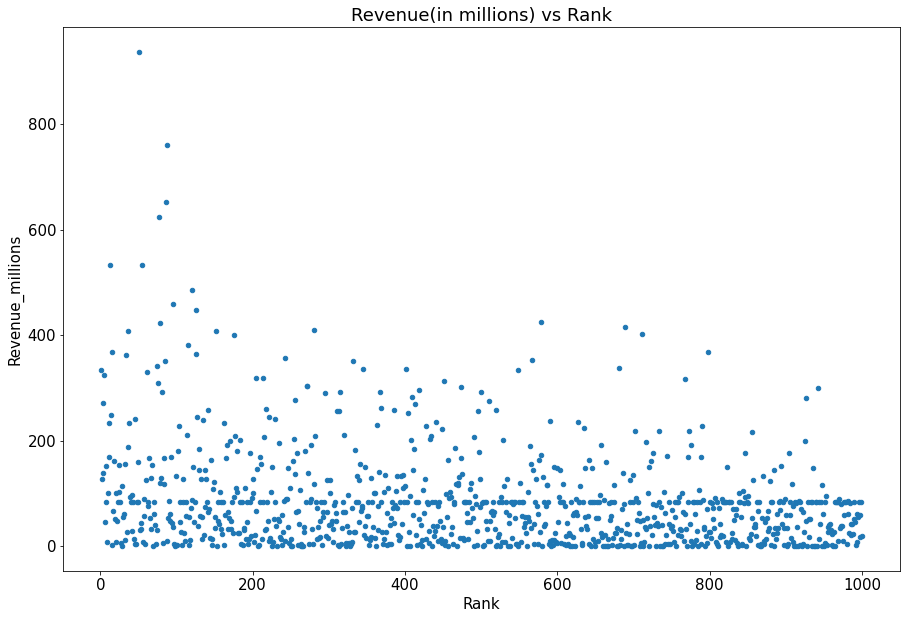

In [ ]:
movies_df.plot(kind='scatter',x='Rank',y='Revenue_millions',title='Revenue(in millions) vs Rank')

Histogram can be obtained by mentioning kind='hist'

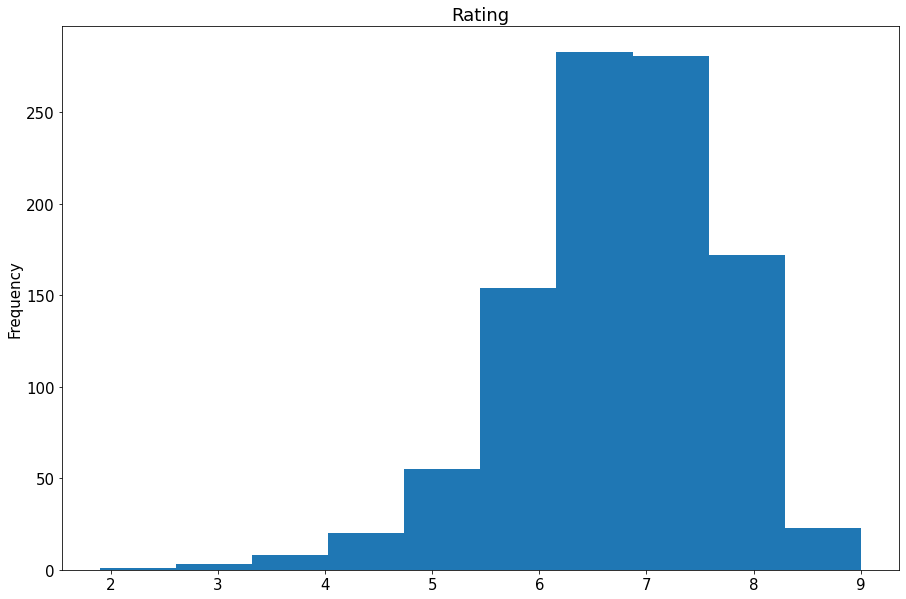

In [ ]:
movies_df['Rating'].plot(kind='hist',title='Rating')

For box plot, we give kind='box'

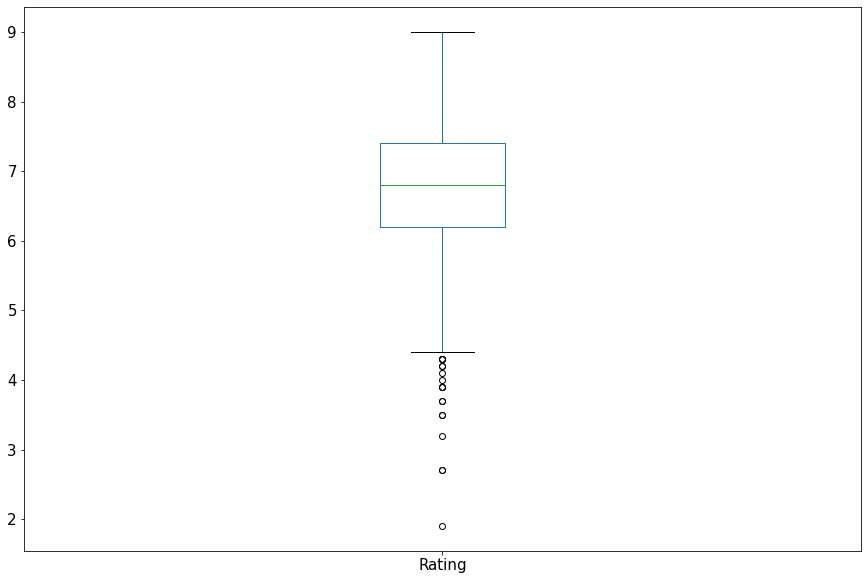

In [ ]:
movies_df['Rating'].plot(kind="box")